In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2 #pip install opencv-python

In [47]:
train_dir_data01 = os.path.abspath(os.getcwd())+"\\train\\data01_train\\"
val_dir_data01 = os.path.abspath(os.getcwd())+"\\dev\\data01_dev"
num_train_data01 = len(os.listdir(train_dir_data01))
num_val_data01 = len(os.listdir(val_dir_data01))
print("Train data count: " + str(num_train_data01))
print("Validation data count: " + str(num_val_data01))

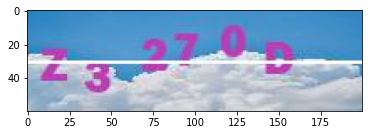

In [49]:
imgtest = plt.imread(train_dir_data01+"\\000000.jpg")
plt.imshow(imgtest)

In [50]:
import pandas as pd
data = pd.read_csv("train\\data01_train.csv")

In [62]:
for i in range(len(data)):
    data.iloc[i,1] = list(data.iloc[i,1])
data

In [52]:
batch_size = 128
epochs = 15
IMG_HEIGHT = imgtest.shape[0]
IMG_WIDTH = imgtest.shape[1]
CLASS_NAMES = np.array([])
for i in range(10):
    CLASS_NAMES =np.append(CLASS_NAMES,chr(ord("0")+i))
for i in range(26):
    CLASS_NAMES = np.append(CLASS_NAMES,chr(ord("A")+i))

In [55]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [64]:
train_data_gen = train_image_generator.flow_from_dataframe(data,
                                                           directory = train_dir_data01,
                                                           x_col = "filename",
                                                           y_col = "code",
                                                           batch_size=batch_size,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                           classes=list(CLASS_NAMES))

Found 50000 validated image filenames belonging to 36 classes.
